In [4]:
#Path to the directory where the original dataset was uncompressed
import os, shutil
original_dataset_dir = 'C:/Users/nqbao/Desktop/Bao/WSU_Data Sc/Deep learning project/Materials/handson-ml/dogs-vs-cats/train'

#Directory where you’ll store your smaller dataset
base_dir = 'C:/Users/nqbao/Desktop/Bao/WSU_Data Sc/Deep learning project/Materials/handson-ml/dogs-vs-cats/smaller'
os.mkdir(base_dir)

#Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
#Directory with training cat and dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
#Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [10]:
#Constructing the model
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
#Preprocessing data
from keras.preprocessing.image import ImageDataGenerator
#Rescaling all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, 
                              validation_steps=50)

C:\Users\nqbao\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 32s 312ms/step - loss: 0.6909 - acc: 0.5498 - val_loss: 0.6633 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 24s 245ms/step - loss: 0.6622 - acc: 0.5835 - val_loss: 0.6481 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 26s 255ms/step - loss: 0.6092 - acc: 0.6586 - val_loss: 0.6721 - val_acc: 0.6230
Epoch 4/30
100/100 [==============================] - 26s 260ms/step - loss: 0.5816 - acc: 0.6982 - val_loss: 0.6032 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 26s 255ms/step - loss: 0.5400 - acc: 0.7160 - val_loss: 0.5935 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 26s 259ms/step - loss: 0.5428 - acc: 0.7083 - val_loss: 0.5660 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 28s 281ms/step - loss: 0.5017 - acc: 0.7453 - val_loss: 0.5660 - val_acc: 0.7080
Epoch 8/30
100/100 [==============================] - 2

In [17]:
#Saving the model
model.save('cats_and_dogs_small_1.h5')

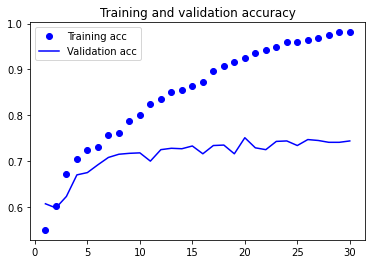

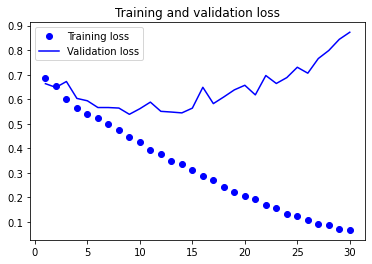

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

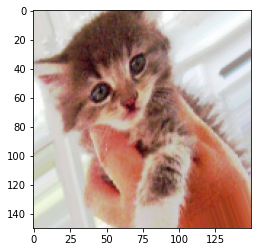

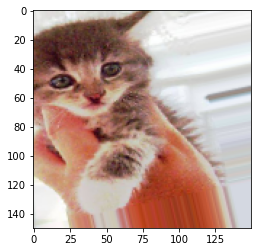

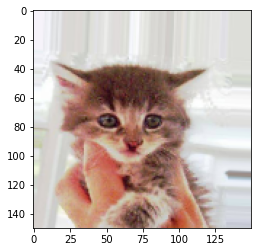

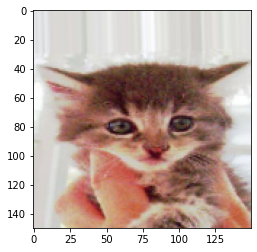

In [20]:
#Data augmentation
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)  #convert the image to a Numpy array with shape 150.150.3
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
#Defining new model with dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                        batch_size=20, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, 
                              validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 268ms/step - loss: 0.6892 - acc: 0.5365 - val_loss: 0.6947 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6792 - acc: 0.5625 - val_loss: 0.6808 - val_acc: 0.5450
Epoch 3/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6670 - acc: 0.6005 - val_loss: 0.8021 - val_acc: 0.5010
Epoch 4/100
100/100 [==============================] - 30s 302ms/step - loss: 0.6618 - acc: 0.5985 - val_loss: 0.6278 - val_acc: 0.6520
Epoch 5/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6463 - acc: 0.6275 - val_loss: 0.6176 - val_acc: 0.6620
Epoch 6/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6348 - acc: 0.6285 - val_loss: 0.6235 - val_acc: 0.6280
Epoch 7/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6297 - acc: 0.6320 -

100/100 [==============================] - 28s 281ms/step - loss: 0.4389 - acc: 0.7945 - val_loss: 0.4476 - val_acc: 0.7820
Epoch 61/100
100/100 [==============================] - 28s 280ms/step - loss: 0.4395 - acc: 0.8005 - val_loss: 0.4373 - val_acc: 0.7940
Epoch 62/100
100/100 [==============================] - 29s 289ms/step - loss: 0.4629 - acc: 0.7815 - val_loss: 0.4613 - val_acc: 0.7850
Epoch 63/100
100/100 [==============================] - 28s 280ms/step - loss: 0.4439 - acc: 0.7880 - val_loss: 0.4349 - val_acc: 0.7920
Epoch 64/100
100/100 [==============================] - 28s 280ms/step - loss: 0.4325 - acc: 0.7885 - val_loss: 0.4440 - val_acc: 0.7940
Epoch 65/100
100/100 [==============================] - 28s 282ms/step - loss: 0.4444 - acc: 0.7960 - val_loss: 0.4336 - val_acc: 0.8030
Epoch 66/100
100/100 [==============================] - 28s 280ms/step - loss: 0.4501 - acc: 0.7850 - val_loss: 0.5274 - val_acc: 0.7500
Epoch 67/100
100/100 [==============================] 

In [26]:
model.save('cats_and_dogs_small_2.h5')

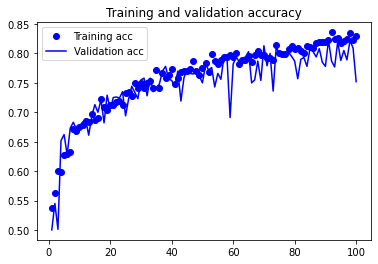

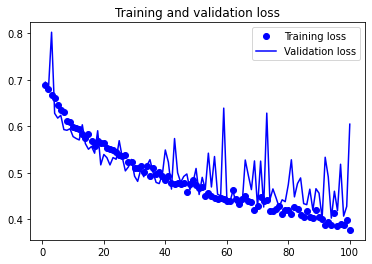

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
sd